In [3]:
#basic imports
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import warnings
from collections import Counter

warnings.filterwarnings("ignore")

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve
%matplotlib inline
from sklearn.metrics import precision_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, f1_score

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor


# Metrics
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

In [2]:
test_df = pd.read_csv("Data/test_values.csv")
train_label_df = pd.read_csv("Data/training_labels.csv")
train_values_df = pd.read_csv("Data/training_values.csv")

In [4]:
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
test_df.shape

(14850, 40)

In [5]:
train_label_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
train_values_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
train_label_df.shape

(59400, 2)

In [6]:
#merge 2 dataframes on id
df1 = pd.merge(train_values_df, train_label_df, on="id")

In [7]:
df1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [8]:
#concat test and train vertically, to add additional rows
well_df = pd.concat([df1,test_df], axis=0)

In [9]:
well_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,NaN
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,NaN
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,NaN


In [10]:
#Looking at the general information
well_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

#### 
- There are 74250 rows and 41 columns in the dataset with variables of these datatypes: float64(3), int64(7), object(31)
- The categorical columns (dtypes = object) are "date_recorded", "funder", "installer", "wpt_name", "basin", "subvillage", "region", "lga", "ward", "public_meeting","recorded_by",  "scheme_management", "scheme_name", "permit", "extraction_type", "extraction_type_group","extraction_type_class", "management", "management_group", "payment"    payment_type, water_quality, quality_group, quantity, quantity_group, source              source_type, source_class, waterpoint_type, waterpoint_type_group, status_group 
- There's missing values in funder, installer, subvillage, public meeting, scheme_management, scheme_name, permit, status group

In [11]:
well_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [12]:
def display_all(well_df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(well_df)
display_all(well_df.head())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [13]:
well_df.describe(include='object')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,74250,69746,69718,74250,74250,73780,74250,74250,74250,70095,...,74250,74250,74250,74250,74250,74250,74250,74250,74250,59400
unique,369,2140,2410,45684,9,21425,21,125,2098,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-17,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,695,11299,21751,4440,12871,646,6599,3128,386,63749,...,63505,63505,41522,41522,21216,21216,57286,35628,43239,32259


In [14]:
## remove nulls, especially in target variable

In [15]:
well_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [34]:
# drop status nulls
df = well_df.dropna(subset=['status_group', 'permit', "scheme_management","installer", "funder", "public_meeting"], axis = 0)

In [35]:
df.reset_index(drop=True)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
2,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
3,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
4,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
48647,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
48648,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
48649,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [36]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 363
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              20476
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [19]:
df.shape


(48651, 41)

In [37]:
## dropping columns that aren't relevant
# Drop recorded_by column since it's constant and should be ignored.
df.drop(['recorded_by'], axis=1, inplace=True)
df.drop(['lga', 'scheme_name', 'subvillage', 'ward', 'wpt_name', "id"], axis=1, inplace=True)

In [21]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [38]:
df.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48651 entries, 0 to 59399
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             48651 non-null  float64
 1   date_recorded          48651 non-null  object 
 2   funder                 48651 non-null  object 
 3   gps_height             48651 non-null  int64  
 4   installer              48651 non-null  object 
 5   longitude              48651 non-null  float64
 6   latitude               48651 non-null  float64
 7   num_private            48651 non-null  int64  
 8   basin                  48651 non-null  object 
 9   region                 48651 non-null  object 
 10  region_code            48651 non-null  int64  
 11  district_code          48651 non-null  int64  
 12  population             48651 non-null  int64  
 13  public_meeting         48651 non-null  object 
 14  scheme_management      48651 non-null  object 
 15  pe

In [40]:
#convert date recorded to year recorded
df['date'] = pd.to_datetime(df['date_recorded'])
df['year recorded'], df['month'] = df['date'].dt.year, df['date'].dt.month


In [41]:
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")

df.dtypes

amount_tsh                      float64
date_recorded                  category
funder                         category
gps_height                        int64
installer                      category
longitude                       float64
latitude                        float64
num_private                       int64
basin                          category
region                         category
region_code                       int64
district_code                     int64
population                        int64
public_meeting                 category
scheme_management              category
permit                         category
construction_year                 int64
extraction_type                category
extraction_type_group          category
extraction_type_class          category
management                     category
management_group               category
payment                        category
payment_type                   category
water_quality                  category


In [42]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,date,year recorded,month
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011-03-14,2011,3
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013-02-25,2013,2
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013-01-28,2013,1
5,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,0,Pangani,Tanga,...,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional,2011-03-13,2011,3
6,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,0,Internal,Shinyanga,...,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,2012-10-01,2012,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,0,Wami / Ruvu,Morogoro,...,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,2011-03-09,2011,3
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2013-05-03,2013,5
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,...,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,2011-05-07,2011,5
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,...,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011-03-08,2011,3


In [43]:
df.drop(columns=["date_recorded", 'date', "month","waterpoint_type_group", "source_type", "quantity_group", "payment", "extraction_type_group", "num_private", "gps_height", "management_group", "extraction_type" ,"amount_tsh", "region_code", "permit", "source_class", "year recorded", "scheme_management", "management", 'public_meeting', 'longitude','latitude', 'funder', 'installer','district_code'], inplace = True)


In [44]:
display_all(df.head())

,basin,region,population,construction_year,extraction_type_class,payment_type,water_quality,quality_group,quantity,source,waterpoint_type,status_group
0,Lake Nyasa,Iringa,109,1999,gravity,annually,soft,good,enough,spring,communal standpipe,functional
2,Pangani,Manyara,250,2009,gravity,per bucket,soft,good,enough,dam,communal standpipe multiple,functional
3,Ruvuma / Southern Coast,Mtwara,58,1986,submersible,never pay,soft,good,dry,machine dbh,communal standpipe multiple,non functional
5,Pangani,Tanga,1,2009,submersible,per bucket,salty,salty,enough,other,communal standpipe multiple,functional
6,Internal,Shinyanga,0,0,handpump,never pay,soft,good,enough,machine dbh,hand pump,non functional


In [45]:
df["region"].value_counts()

Iringa           5220
Kilimanjaro      4206
Shinyanga        3680
Morogoro         2953
Kagera           2845
Arusha           2836
Kigoma           2774
Mbeya            2695
Tanga            2543
Pwani            2490
Mwanza           2380
Dodoma           2191
Ruvuma           2115
Tabora           1862
Rukwa            1741
Mtwara           1518
Manyara          1458
Singida          1040
Lindi            1005
Mara              755
Dar es Salaam     344
Name: region, dtype: int64

In [46]:
#make this into a binary feature
df["status_group"].value_counts()

functional                 26720
non functional             18432
functional needs repair     3499
Name: status_group, dtype: int64

In [47]:
#from sklearn.preprocessing import LabelEncoder
#from sklearn import preprocessing 
#label = preprocessing.LabelEncoder() 
 
#df['basin']= label.fit_transform(df['basin']) 
#print(df['basin'].unique())

In [48]:
df['status_group']=np.where(df['status_group'] =='functional needs repair', 'functional', df['status_group'])

In [49]:
df["status_group"].value_counts()

functional        30219
non functional    18432
Name: status_group, dtype: int64

In [50]:
df.to_csv('cleaned data.csv')  

In [37]:
#Visualize Data

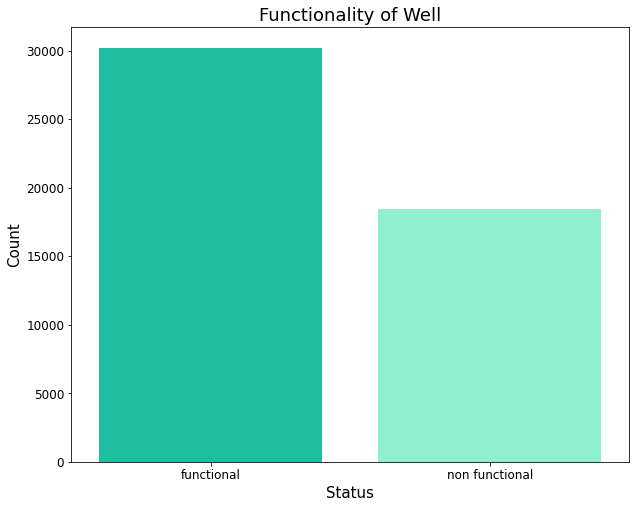

<Figure size 432x288 with 0 Axes>

In [51]:
fig ,ax = plt.subplots(figsize = (10,8))
sns.countplot(df["status_group"],palette=['#04D8B2',"#7FFFD4"] )
ax.set_title('Functionality of Well', fontdict = {'fontsize': 18})
ax.set_xlabel('Status', fontdict = {'fontsize': 15})
ax.set_ylabel('Count', fontdict = {'fontsize': 15})
plt.tick_params(axis='both', labelsize=12)
plt.show()
plt.savefig('Function_bp.png')


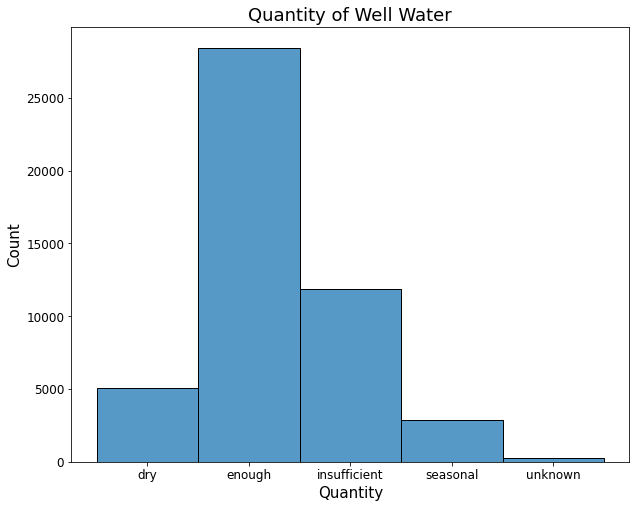

<Figure size 432x288 with 0 Axes>

In [52]:
fig ,ax = plt.subplots(figsize = (10,8))

sns.color_palette("mako", as_cmap=True)
sns.histplot(df['quantity'])
ax.set_title('Quantity of Well Water', fontdict = {'fontsize': 18})
ax.set_xlabel('Quantity', fontdict = {'fontsize': 15})
ax.set_ylabel('Count', fontdict = {'fontsize': 15})
plt.tick_params(axis='both', labelsize=12)
plt.show()
plt.savefig('Quanity__bp.pdf')

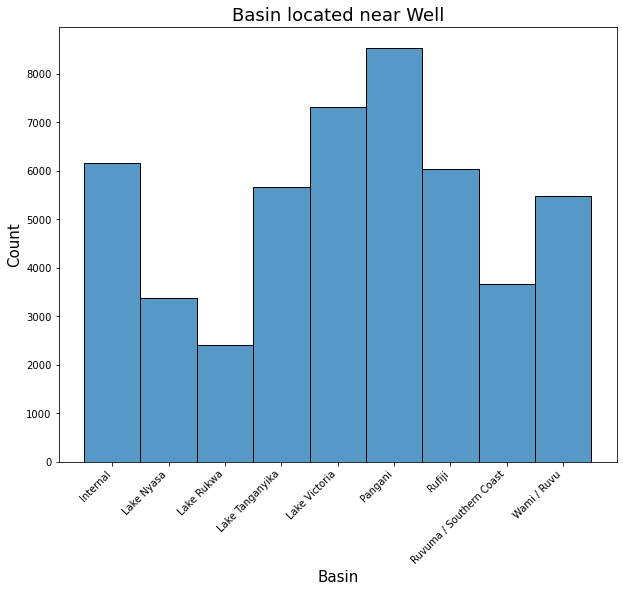

In [53]:
fig ,ax = plt.subplots(figsize = (10,8))
sns.histplot(df['basin'])
ax.set_title('Basin located near Well', fontdict = {'fontsize': 18})
ax.set_xlabel('Basin', fontdict = {'fontsize': 15})
ax.set_ylabel('Count', fontdict = {'fontsize': 15})
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=45, ha="right")
plt.show()

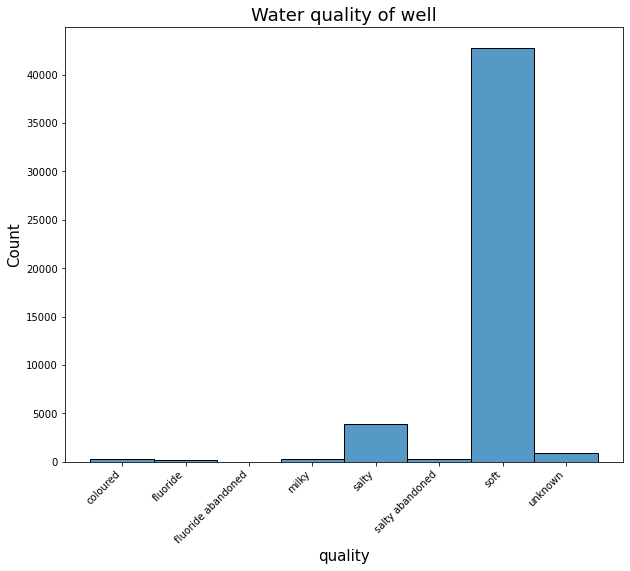

In [54]:
fig ,ax = plt.subplots(figsize = (10,8))
sns.histplot(df['water_quality'])
ax.set_title('Water quality of well', fontdict = {'fontsize': 18})
ax.set_xlabel('quality', fontdict = {'fontsize': 15})
ax.set_ylabel('Count', fontdict = {'fontsize': 15})
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=45, ha="right")
plt.show()

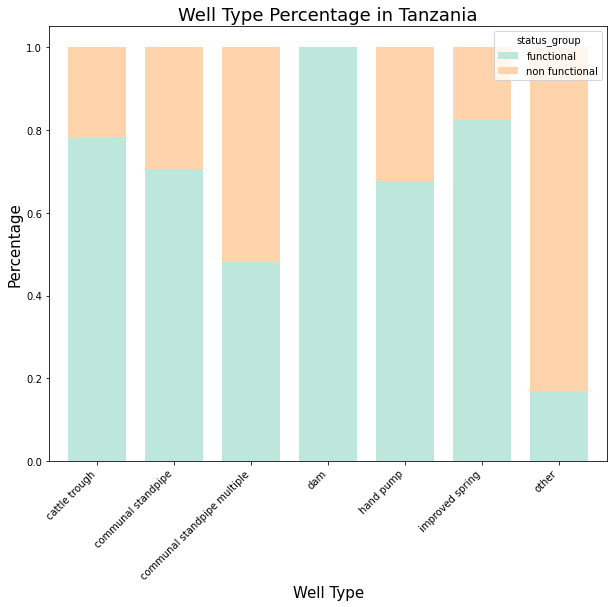

In [55]:
fig ,ax = plt.subplots(figsize = (10,8))

x = 'waterpoint_type'
y = 'status_group'
df_grouped = df.groupby(x)[y].value_counts(normalize=True).unstack(y)
df_grouped.plot.bar(stacked=True, cmap = "icefire", width=0.75, ax=ax)
ax.set_title('Well Type Percentage in Tanzania', fontdict = {'fontsize': 18})
ax.set_xlabel('Well Type', fontdict = {'fontsize': 15})
ax.set_ylabel('Percentage', fontdict = {'fontsize': 15})
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=45, ha="right")
plt.show()

#ax =(df.groupby('waterpoint_type')['status_group'].value_counts(normalize=True)
#.unstack('status_group').plot.bar(stacked=True)



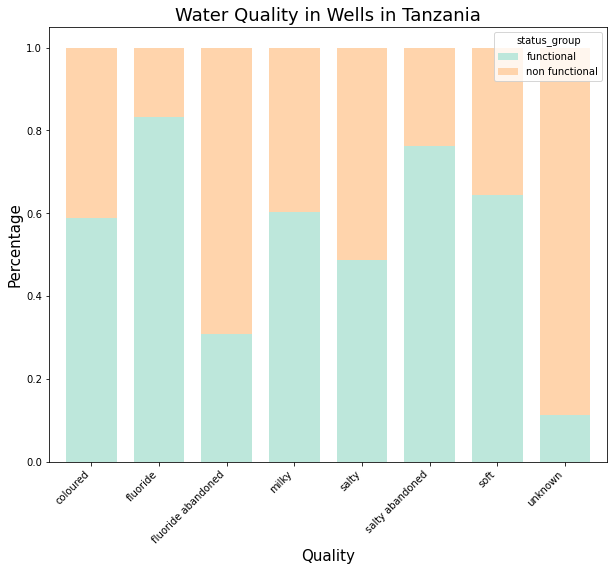

In [56]:


fig ,ax = plt.subplots(figsize = (10,8))

x = "water_quality"
y = 'status_group'
df_grouped = df.groupby(x)[y].value_counts(normalize=True).unstack(y)
df_grouped.plot.bar(stacked=True, cmap = "icefire", width=0.75, ax=ax)
ax.set_title('Water Quality in Wells in Tanzania', fontdict = {'fontsize': 18})
ax.set_xlabel('Quality', fontdict = {'fontsize': 15})
ax.set_ylabel('Percentage', fontdict = {'fontsize': 15})
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=45, ha="right")
plt.show()

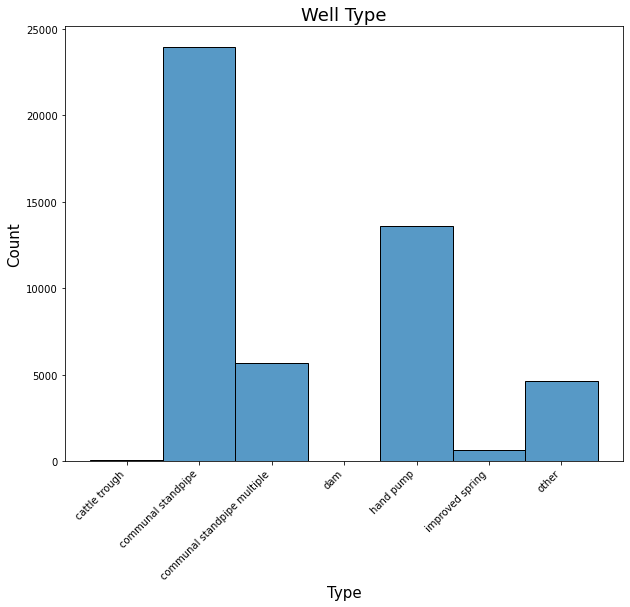

In [57]:
fig ,ax = plt.subplots(figsize = (10,8))
sns.histplot(df['waterpoint_type'])
ax.set_title('Well Type', fontdict = {'fontsize': 18})
ax.set_xlabel('Type', fontdict = {'fontsize': 15})
ax.set_ylabel('Count', fontdict = {'fontsize': 15})
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=45, ha="right")
plt.show()
#plt.savefig('Well_Type_bp.pdf')

In [58]:
df.columns.values


array(['basin', 'region', 'population', 'construction_year',
       'extraction_type_class', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'source', 'waterpoint_type',
       'status_group'], dtype=object)

In [59]:
df["status_group"].unique()

array(['functional', 'non functional'], dtype=object)

In [60]:
df["status_group"]= np.where(df["status_group"] == "functional" , 0, 1)

In [61]:
df.to_csv('binary_target.csv')  

In [62]:
df.shape

(48651, 12)

In [63]:
df.dtypes

basin                    category
region                   category
population                  int64
construction_year           int64
extraction_type_class    category
payment_type             category
water_quality            category
quality_group            category
quantity                 category
source                   category
waterpoint_type          category
status_group                int64
dtype: object

In [64]:
# Modelling 

X = df.drop('status_group',1)
y = df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = .3, 
                                                    random_state =42)

nom_cols = X_train.select_dtypes('category').columns
num_cols = X_train.select_dtypes('number').columns

In [52]:
nom_cols

Index(['basin', 'region', 'extraction_type_class', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')

### Modelling
### Model 1: Logistic Regression

In [65]:
## pipeline steps :: 

## how we will deal with our features 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])


nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = True, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])

ct = ColumnTransformer([ 
     ("nominalpipe", nominal_pipeline, nom_cols),
     ("numpipe", numeric_pipeline, num_cols)])


#model #1 
pipe_1 = Pipeline([('preprocess', ct),
                 ('model', LogisticRegression())])


pipe_1.fit(X_train, y_train)
print("train score:", pipe_1.score(X_train,y_train))
print("test score:", pipe_1.score(X_test,y_test))
preds1 = pipe_1.predict(X_test)


train score: 0.7879312876229628
test score: 0.7882981638805152


In [66]:
#checking for imbalance
y.value_counts()

0    30219
1    18432
Name: status_group, dtype: int64

In [67]:
from sklearn.model_selection import cross_val_score
model=LogisticRegression()

scores = cross_val_score(pipe_1, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7875496122847908


In [68]:
model1_precision = precision_score(y_test, preds1)
model1_precision

print('Model 1 precision Score:', model1_precision)

Model 1 precision Score: 0.8207497360084477


In [69]:
model1_recall = recall_score(y_test, preds1)
model1_recall

print('Model 1 recall Score:', model1_recall)

Model 1 recall Score: 0.5632246376811594


In [70]:
model1_f1 = f1_score(y_test, preds1)
model1_f1

print('Model 1 f1 Score:', model1_f1)

Model 1 f1 Score: 0.668027503223034


In [71]:
confusion_matrix(preds1,y_test)

array([[8397, 2411],
       [ 679, 3109]])

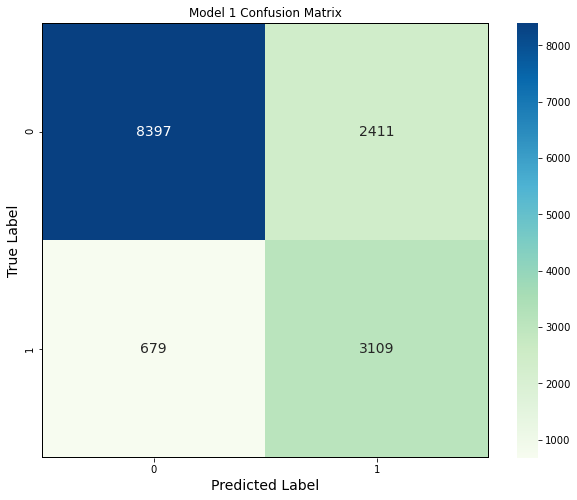

In [72]:
conf_mat_best = confusion_matrix( preds1, y_test,)
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
             cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 1 Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

In [73]:
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.78      0.93      0.84      9076
           1       0.82      0.56      0.67      5520

    accuracy                           0.79     14596
   macro avg       0.80      0.74      0.76     14596
weighted avg       0.79      0.79      0.78     14596



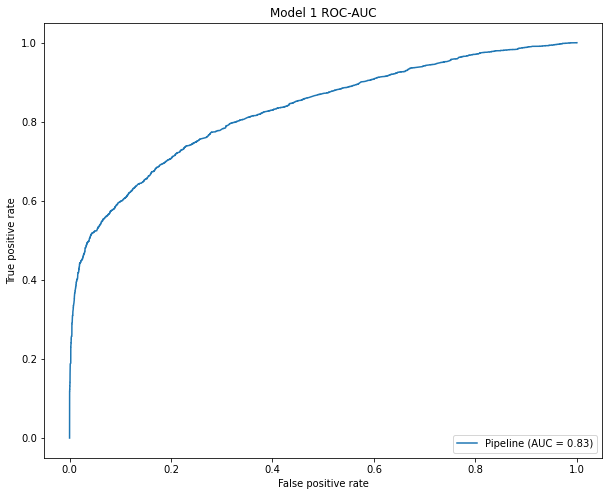

In [74]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(pipe_1, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 1 ROC-AUC')
plt.show()

### Model 1 Metric Summary
- train score: 0.8281309646160623
- test score: 0.8201562071800493
- Cross-Validation Accuracy Scores 0.8172368964503344
- Model 1 precision Score: 0.8230305735326936
- Model 1 recall Score: 0.64
- Model 1 f1 Score: 0.72
- AUC = 0.86



### Model 2: Logistic Regression with over Sampling

In [75]:
from imblearn.pipeline import Pipeline

#Model 2
pipe_2 = Pipeline([('preprocess', ct),
                 ('sampling', RandomOverSampler(random_state = 42)),
                 ('model', LogisticRegression())])

In [76]:
pipe_2.fit(X_train, y_train)
print("train score is", pipe_2.score(X_train,y_train))
print("test score is", pipe_2.score(X_test,y_test))
preds2 = pipe_2.predict(X_test)


train score is 0.774922918807811
test score is 0.7734995889284736


In [77]:
scores = cross_val_score(pipe_2, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7725738805925106


In [78]:
model2_precision = precision_score(y_test, preds2)
model2_precision

print('Model 2 precision Score:', model2_precision)

Model 2 precision Score: 0.7130484988452656


In [79]:
model2_recall = recall_score(y_test, preds2)
model2_recall

print('Model 2 recall Score:', model2_recall)

Model 2 recall Score: 0.6711956521739131


In [80]:
model2_f1 = f1_score(y_test, preds2)
model2_f1

print('Model 2 f1 Score:', model2_f1)

Model 2 f1 Score: 0.6914893617021276


In [81]:
confusion_matrix(preds2,y_test)

array([[7585, 1815],
       [1491, 3705]])

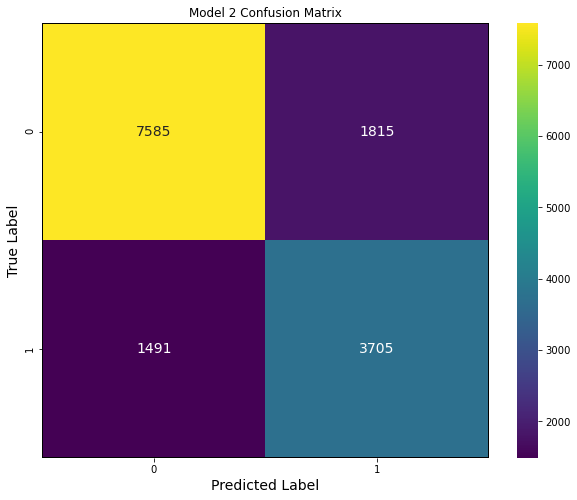

In [82]:
conf_mat_best = confusion_matrix( preds2, y_test,)
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 2 Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

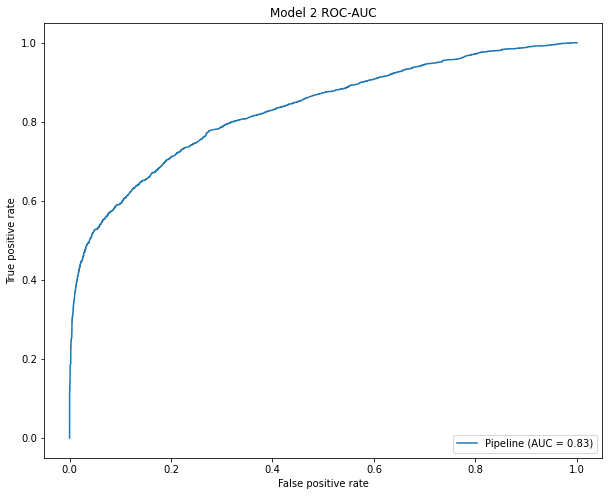

In [83]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(pipe_2, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 2 ROC-AUC')
plt.show()

In [84]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      9076
           1       0.71      0.67      0.69      5520

    accuracy                           0.77     14596
   macro avg       0.76      0.75      0.76     14596
weighted avg       0.77      0.77      0.77     14596



### Model 2 Metrics Summary
- train score is 0.8215533695492585
- test score is 0.8052206083858592
- Cross-Validation Accuracy Scores 0.8083101083602141
- Model 2 precision Score: 0.74
- Model 2 recall Score: 0.73
- Model 2 f1 Score: 0.74
- ROC = 0.87


### Model 3: Logistic Regression with SMOTE

In [ ]:
#Model 3
pipe_3 = Pipeline([('preprocess', ct),
                 ('smt', SMOTE()),
                 ('model', LogisticRegression())])

In [ ]:
pipe_3.fit(X_train, y_train)
print("train score is", pipe_3.score(X_train,y_train))
print("test score is", pipe_3.score(X_test,y_test))
preds3 = pipe_3.predict(X_test)

In [ ]:
scores = cross_val_score(pipe_3, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores.mean())

In [ ]:
model3_precision = precision_score(y_test, preds3)
model3_precision

print('Model 3 precision Score:', model3_precision)

In [ ]:
model3_recall = recall_score(y_test, preds3)
model3_recall

print('Model 3 recall Score:', model3_recall)

In [ ]:
model3_f1 = f1_score(y_test, preds3)
model3_f1

print('Model 3 f1 Score:', model3_f1)

In [ ]:
confusion_matrix(preds3,y_test)

In [ ]:
conf_mat_best = confusion_matrix( preds3, y_test,)
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 3 Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

In [ ]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(pipe_3, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 3 ROC-AUC')
plt.show()

In [ ]:
print(classification_report(y_test, preds3))

### Model 3 Metrics Summary:
- train score is 0.8218176479224784
- test score is 0.8041244176486708
- Cross-Validation Accuracy Scores 0.8057847599471444
- Model 3 precision Score: 0.7378866440193098
- Model 3 recall Score: 0.7476449275362319
- Model 3 f1 Score: 0.7423142421797975
- ROC = 0.87

### Model 4: Decision Tree

In [85]:
#Model 4
steps = [("preprocess", ct),
        ('rf_clf', DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42))]

pipe_4 = Pipeline(steps)

# Train the pipeline (tranformations & predictor)
pipe_4.fit(X_train, y_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
preds4 = pipe_4.predict(X_test)
print(preds4)

[0 0 0 ... 0 0 1]


In [86]:
model_pipe = Pipeline(steps)
model_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['basin', 'region', 'extraction_type_class', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['population', 'construction_year']

In [87]:
pipe4 =pipe_4.fit(X_train, y_train)
print("train score is", pipe_4.score(X_train,y_train))
print("test score is", pipe_4.score(X_test,y_test))
preds4 = pipe_4.predict(X_test)



train score is 0.7616502716194391
test score is 0.7658947656892299


In [88]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler


n_components = list(range(1,X.shape[1]+1,1))
criterion = ["gini", "entropy"]
max_depth = [2,4,6,8,10]

parameters = dict(rf_clf__criterion=criterion,
                rf_clf__max_depth=max_depth)
clf_GSCV = GridSearchCV(pipe_4, parameters)
clf_GSCV.fit(X, y)


print(clf_GSCV.best_estimator_.get_params()["rf_clf"])
CV_Result = cross_val_score(clf_GSCV, X_train, y_train, cv=3, n_jobs=-1, scoring="accuracy")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())



DecisionTreeClassifier(max_depth=10, random_state=42)
[0.79897815 0.80796335 0.80327724]
0.8034062507999852
0.0036693269653401087


In [89]:
scores = cross_val_score(pipe_4, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7617677286742035


In [90]:
model4_precision = precision_score(y_test, preds4)
model4_precision

print('Model 4 precision Score:', model4_precision)

Model 4 precision Score: 0.8981446421809921


In [92]:
model4_recall = recall_score(y_test, preds4)
model4_recall

print('Model 4 recall Score:', model4_recall)

Model 4 recall Score: 0.42971014492753623


In [93]:
model4_f1 = f1_score(y_test, preds4)
model4_f1

print('Model 4 f1 Score:', model4_f1)

Model 4 f1 Score: 0.5813013111138341


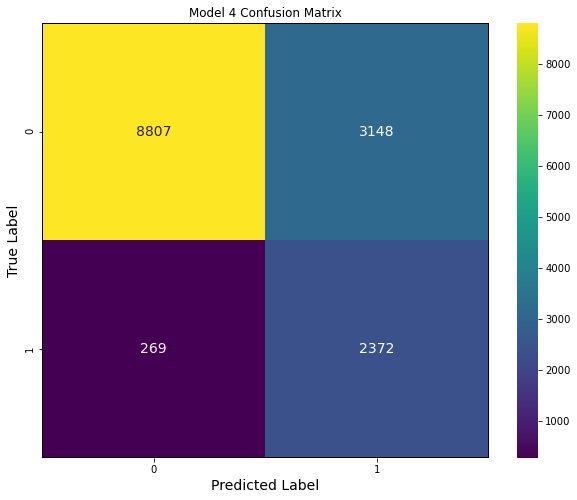

In [91]:
conf_mat_best = confusion_matrix( preds4, y_test,)
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 4 Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

In [ ]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(pipe_4, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 4 ROC-AUC')
plt.show()


In [ ]:
print(classification_report(y_test, preds4))

### Model 4 Metrics Summary
- train score is 0.7620320070474232
- test score is 0.7659632776103041
- Cross-Validation Accuracy Scores 0.761914549992659
- Model 4 precision Score: 0.8990895295902883
- Model 4 recall Score: 0.42934782608695654
- Model 4 f1 Score: 0.5811672388425699
- ROC = 0.75

### Model 5: K Neighbours Classifier

In [94]:
#model 5
from imblearn.pipeline import Pipeline
pipe_5 = Pipeline([("preprocess", ct),
                   ('over', RandomOverSampler(random_state = 42)),
                   ('knn', KNeighborsClassifier())])

pipe_5.fit(X_train, y_train)
print("train score is", pipe_5.score(X_train,y_train))
print("test score is", pipe_5.score(X_test,y_test))
preds5 = pipe_5.predict(X_test)

train score is 0.8463661723682279
test score is 0.796451082488353


In [95]:
scores = cross_val_score(pipe_5, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores.mean())


Cross-Validation Accuracy Scores 0.7868448098663926


In [96]:
model5_precision = precision_score(y_test, preds5)
model5_precision

print('Model 5 precision Score:', model5_precision)

Model 5 precision Score: 0.7128068124895642


In [97]:
model5_recall = recall_score(y_test, preds5)
model5_recall

print('Model 5 recall Score:', model5_recall)

Model 5 recall Score: 0.7733695652173913


In [98]:
model5_f1 = f1_score(y_test, preds5)
model5_f1

print('Model 5 f1 Score:', model5_f1)

Model 5 f1 Score: 0.7418542010600401


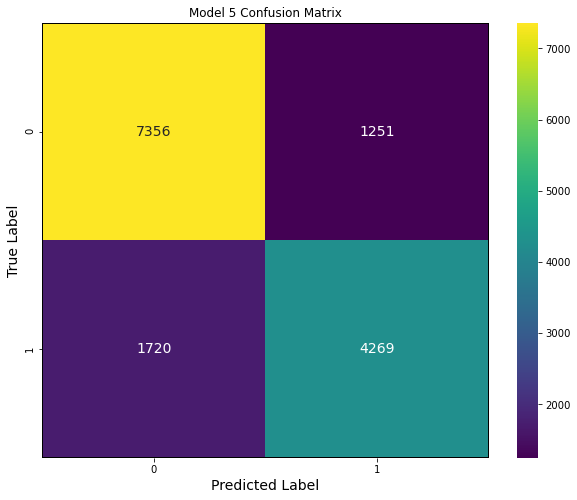

In [99]:
conf_mat_best = confusion_matrix( preds5, y_test,)
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 5 Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

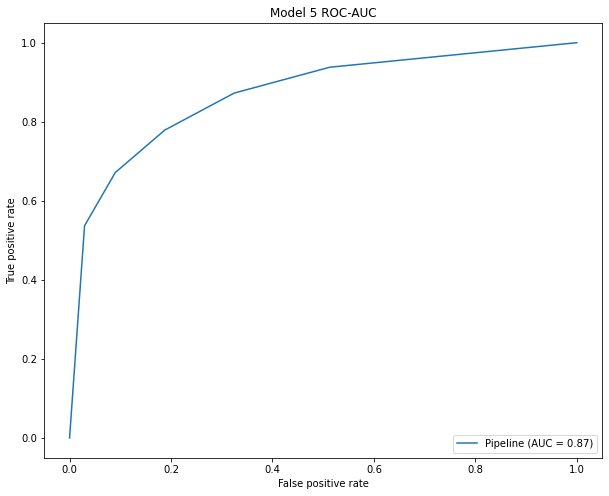

In [66]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(pipe_5, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 5 ROC-AUC')
plt.show()


In [67]:
print(classification_report(y_test, preds5))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      9076
           1       0.72      0.78      0.75      5520

    accuracy                           0.80     14596
   macro avg       0.79      0.80      0.79     14596
weighted avg       0.80      0.80      0.80     14596



### Model 5 (untunned) Metrics Summary 
- train score is 0.8827484950814858
- test score is 0.8146067415730337
- Cross-Validation Accuracy Scores 0.8084275436793422
- Model 5 precision Score: 0.7378866440193098
- Model 5 recall Score: 0.7911231884057971
- Model 5 f1 Score: 0.7634615384615386
- AUC = 0.88

In [101]:
model5_best  = Pipeline([("preprocessor", ct), 
                         ('over', RandomOverSampler(random_state = 42)),
                         ('knn', KNeighborsClassifier())])

In [102]:
knn_params = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13], 'knn__p': [1, 2, 3, 4, 5]}

knn_grid = GridSearchCV(estimator = model5_best, param_grid = knn_params, scoring = 'recall', cv = 5)

In [103]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(handle_unknown='ignore')),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         Index(['basin', 'region', 'extraction_type_class', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')),
                                                                        ('numpipe',
                                                    

In [104]:
knn_grid.best_params_

{'knn__n_neighbors': 5, 'knn__p': 1}

In [105]:
model5_best_params = Pipeline(steps = [ ("preprocessor", ct),
                                        ('over', RandomOverSampler( random_state = 42)),
                                        ('knn', KNeighborsClassifier(n_neighbors = 5,
                                                                     p = 1))])

# Fitting the training data with the updated pipeline
model5_best_params.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['basin', 'region', 'extraction_type_class', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['population', 'construction_year

In [117]:
preds5_best = model5_best_params.predict(X_test)

In [118]:
preds5_best.size

14596

In [108]:
model5_best_precision = precision_score(y_test, preds5_best)
model5_best_precision

print('Model 5 best precision Score:', model5_best_precision)

Model 5 best precision Score: 0.7211522072609511


In [109]:
model5_best_recall = recall_score(y_test, preds5_best)
model5_best_recall

print('Model 5 best model Recall Score:', model5_best_recall)

Model 5 best model Recall Score: 0.7664855072463768


In [110]:
model5_best_f1 = f1_score(y_test, preds5_best)
model5_best_f1

print('Model 5 best f1 Score:', model5_best_f1)

Model 5 best f1 Score: 0.7431281285676649


In [111]:
scores = cross_val_score(model5_best_params, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7898693290265747


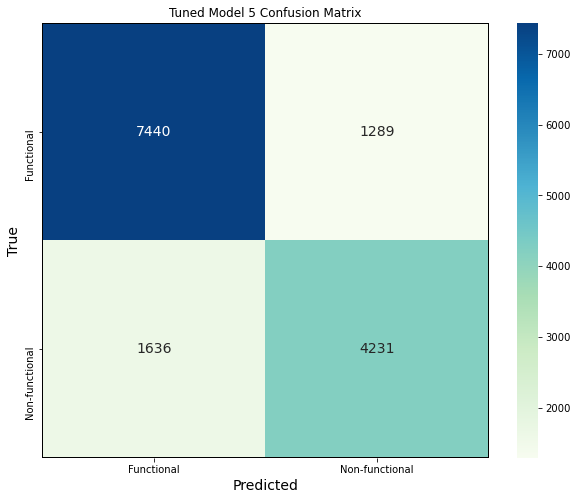

In [112]:
conf_mat_best = confusion_matrix( preds5_best, y_test,)
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True', size = 14)
ax.set_xlabel('Predicted', size = 14)
ax.set_title('Tuned Model 5 Confusion Matrix')
ax.xaxis.set_ticklabels(['Functional', 'Non-functional']); ax.yaxis.set_ticklabels(['Functional', 'Non-functional']);
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()
#plt.savefig('best_mod_CM.pdf')

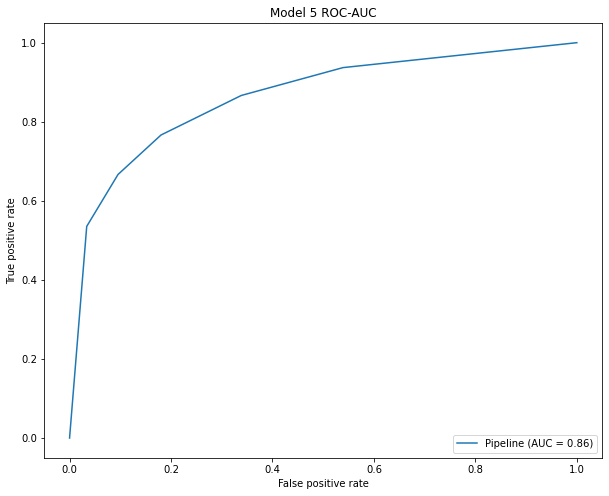

<Figure size 432x288 with 0 Axes>

In [113]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(model5_best_params, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 5 ROC-AUC')
plt.show()
plt.savefig('best_mod_ROC.pdf')


In [114]:
print(classification_report(y_test, preds5_best))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      9076
           1       0.72      0.77      0.74      5520

    accuracy                           0.80     14596
   macro avg       0.79      0.79      0.79     14596
weighted avg       0.80      0.80      0.80     14596



### Model 5 (Tuned) Metric Summary
- Model 5 best precision Score: 0.7434456928838952
- Model 5 best Recall Score: 0.7911231884057971
- Model 5 best f1 Score: 0.766543794979814
- Cross-Validation Accuracy Scores 0.8091910145353106
- ROC = 0.88


### Model 6: Random Forest

In [ ]:
#model 6

pipe_6 = Pipeline([("preprocess", ct),
                   ("smt", SMOTE()),
                    ('forest', RandomForestClassifier(random_state = 42))])

In [ ]:
# Performing a grid search for our random forest
from sklearn.model_selection import RandomizedSearchCV
rf_params = {'forest__criterion': ['gini', 'entropy'],
             'forest__bootstrap': [True],
                          'forest__n_estimators': [50, 150, 200], 
                          'forest__min_samples_leaf': [2, 5, 20, 50],
                         'forest__max_depth': [3, 5, 7, 9, 11, 13, 15]}

rf_grid_pipeline = RandomizedSearchCV(estimator = pipe_6,
                                param_distributions = rf_params
                            )


In [ ]:
# Fitting the training data
rf_grid_pipeline.fit(X_train, y_train)

In [ ]:
rf_grid_pipeline.best_params_

### Model 7: Random Forest with best paramaters

In [ ]:
#creating a new pipeline that uses the best perameters

pipe_7 = Pipeline(steps = [("preprocess", ct), 
                            ("smt", SMOTE()),
                           ('forest', RandomForestClassifier(random_state = 42,
                                                              bootstrap= True,
                                                              criterion = 'gini',
                                                              max_depth = 9,
                                                              min_samples_leaf = 2,
                                                              n_estimators = 50
                                                              ))])

In [ ]:
pipe_7.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# if doing regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Calculating y predictions
preds7 = pipe_7.predict(X_test)


In [ ]:
print("train score is", pipe_7.score(X_train,y_train))
print("test score is", pipe_7.score(X_test,y_test))


In [ ]:
scores = cross_val_score(pipe_7, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores.mean())


In [ ]:
model7_precision = precision_score(y_test, preds7)
model7_precision

print('Model 7 precision Score:', model7_precision)

In [ ]:
model7_recall = recall_score(y_test, preds7)
model7_recall

print('Model 7 recall Score:', model7_recall)

In [ ]:
model7_f1 = f1_score(y_test, preds7)
model7_f1

print('Model 7 f1 Score:', model7_f1)

In [ ]:
conf_mat_best = confusion_matrix( preds7, y_test,)
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 7 Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()
plt.savefig('best_model_CM.pdf')

In [ ]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(pipe_7, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 7 ROC-AUC')
plt.show()


In [ ]:
print(classification_report(y_test, preds7))

### Model 7 (tuned model 6) Metrics Summary
- train score is 0.777301424166789
- test score is 0.7702110167169087
- Cross-Validation Accuracy Scores 0.7727205990309793
- Model 7 precision Score: 0.76
- Model 7 recall Score: 0.65
- Model 7 f1 Score: 0.70
- AUC = 0.84

In [121]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
   model5_best_params, X_test, y_test, n_repeats=5, random_state=42, scoring = "recall"
)

KeyboardInterrupt: 

In [ ]:
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
fig, ax = plt.subplots(figsize = (15,15))
importances.plot.box(vert=False, whis=10, ax = ax)
ax.set_title("Feature Importances", size = 20)
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in recall score", size = 18)
ax.set_ylabel("Features", size = 18)
ax.figure.tight_layout()

plt.savefig('feature_test.pdf')

In [122]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    model5_best_params, X_train, y_train, n_repeats=5, random_state=42, scoring='recall'
)

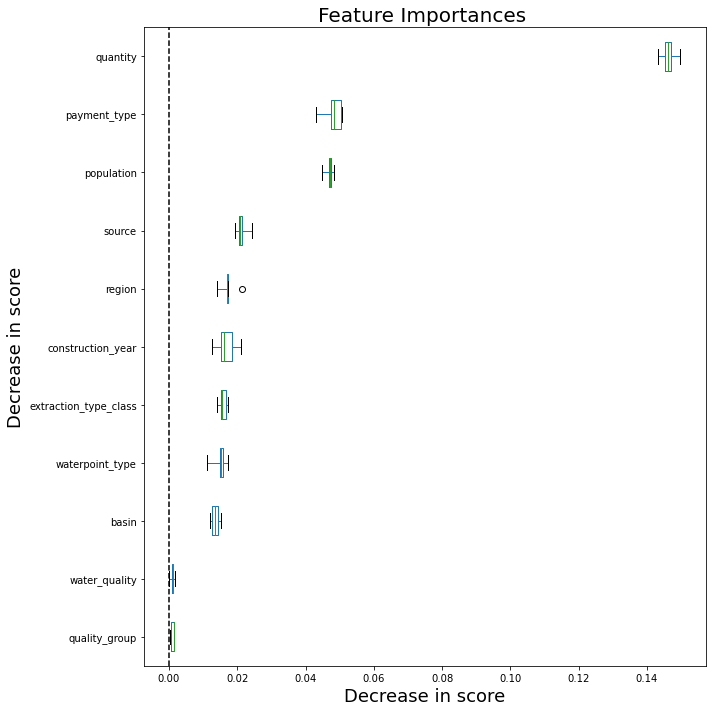

In [123]:
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
fig, ax = plt.subplots(figsize = (10,10))
importances.plot.box(vert=False, whis=10, ax = ax)
ax.set_title("Feature Importances ", size = 20)
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in score", size = 18)
ax.set_ylabel("Decrease in score", size = 18)
ax.figure.tight_layout()
plt.savefig('feature_train.pdf')

In [ ]:
results = permutation_importance(model5_best_params, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(pipe_1, X_test, y_test, ax = ax, name = "baseline Log reg")
plot_roc_curve(pipe_2, X_test, y_test, ax = ax, name = "over sampling Log reg")
plot_roc_curve(pipe_3, X_test, y_test, ax = ax, name = "SMOTE Log reg")
plot_roc_curve(pipe_4, X_test, y_test, ax = ax, name = "Decision Tree")
plot_roc_curve(pipe_5, X_test, y_test, ax = ax, name = "KNN")
plot_roc_curve(model5_best_params, X_test, y_test, ax = ax, name = "KNN tuned")
plot_roc_curve(pipe_7, X_test, y_test, ax = ax, name = "Random Forest tuned")

ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Models ROC-AUC')
plt.show()
plt.savefig('models ROC.pdf')